In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df
df['species'] = iris.target

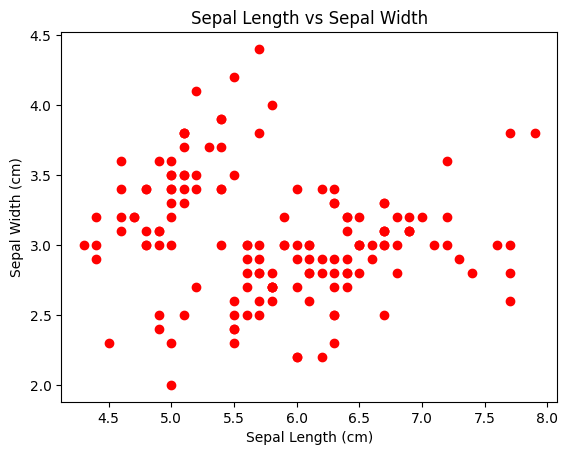

In [5]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [6]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [7]:
y_pred = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
df['Clusters'] = y_pred


In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Clusters
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [10]:
# Visualize clusters
df0 = df[df.Clusters == 0]
df1 = df[df.Clusters == 1]
df2 = df[df.Clusters == 2]

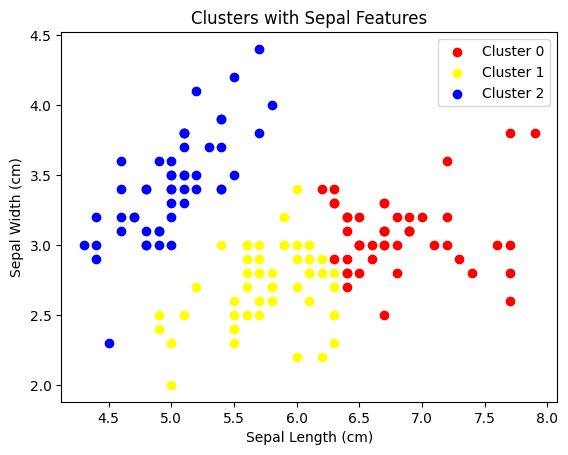

In [11]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', label='Cluster 0')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='yellow', label='Cluster 1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', label='Cluster 2')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters with Sepal Features')
plt.legend()
plt.show()

In [12]:
scaler = MinMaxScaler()
df[['sepal length (cm)', 'sepal width (cm)']] = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])

In [13]:
# Reapply KMeans clustering on scaled data
km1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred1 = km1.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])
df['Cluster'] = y_pred1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
df = df.drop('Clusters', axis=1)

In [15]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]


In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Cluster
0,0.222222,0.625000,1.4,0.2,0,2
1,0.166667,0.416667,1.4,0.2,0,2
2,0.111111,0.500000,1.3,0.2,0,2
3,0.083333,0.458333,1.5,0.2,0,2
4,0.194444,0.666667,1.4,0.2,0,2
...,...,...,...,...,...,...
145,0.666667,0.416667,5.2,2.3,2,0
146,0.555556,0.208333,5.0,1.9,2,1
147,0.611111,0.416667,5.2,2.0,2,0
148,0.527778,0.583333,5.4,2.3,2,0


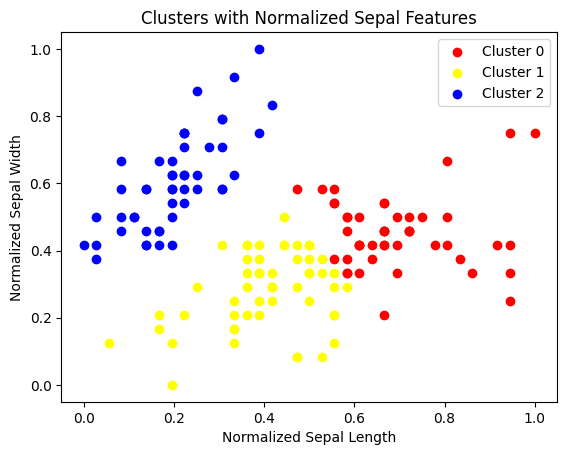

In [17]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', label='Cluster 0')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='yellow', label='Cluster 1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', label='Cluster 2')
plt.xlabel('Normalized Sepal Length')
plt.ylabel('Normalized Sepal Width')
plt.title('Clusters with Normalized Sepal Features')
plt.legend()
plt.show()


In [18]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

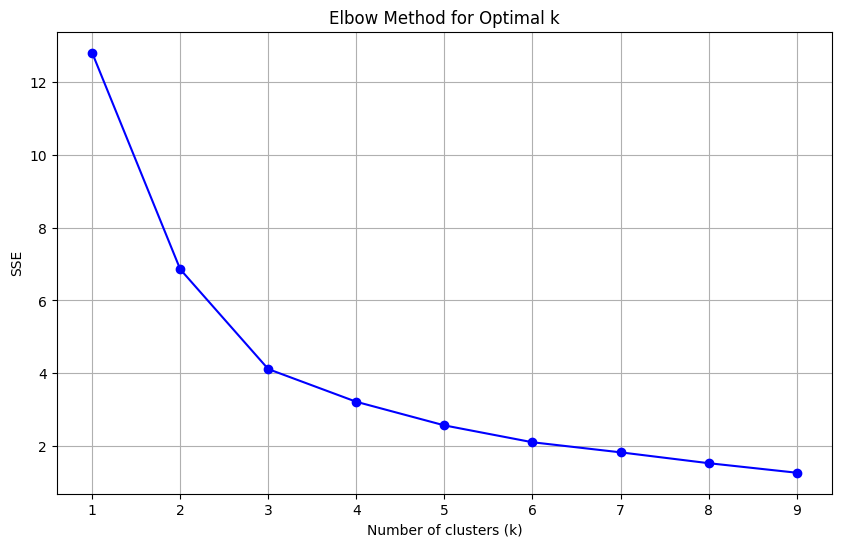

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()